<a href="https://colab.research.google.com/github/chychur/Recurrent_neural_networks/blob/main/Recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Recurrent neural networks

In [98]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

from sklearn.metrics import classification_report

In [83]:
max_features = 10000
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 128 #
epochs = 3 #

In [84]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [85]:
print (X_train.shape, X_test.shape)

(25000,) (25000,)


In [86]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [87]:
for i in range(0, 3):
    print (len(X_train[i]))

218
189
141


In [88]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)


In [89]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (25000, 500)
X_test shape: (25000, 500)


In [90]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [91]:
for i in range(0, 3):
    print (len(X_train[i]))

500
500
500


1. LSTM model creation

In [92]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=max_features,
                    output_dim=embedding_vector_length,
                    input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


In [93]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_8 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 337025 (1.29 MB)
Trainable params: 33702

In [94]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
# train:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    validation_data=(X_test, y_test))

Epoch 1/3
196/196 [==============================] - 92s 458ms/step - loss: 0.4581 - accuracy: 0.7674 - val_loss: 0.3316 - val_accuracy: 0.8599
Epoch 2/3
196/196 [==============================] - 86s 440ms/step - loss: 0.2469 - accuracy: 0.9044 - val_loss: 0.3123 - val_accuracy: 0.8765
Epoch 3/3
196/196 [==============================] - 88s 451ms/step - loss: 0.1878 - accuracy: 0.9298 - val_loss: 0.3247 - val_accuracy: 0.8644


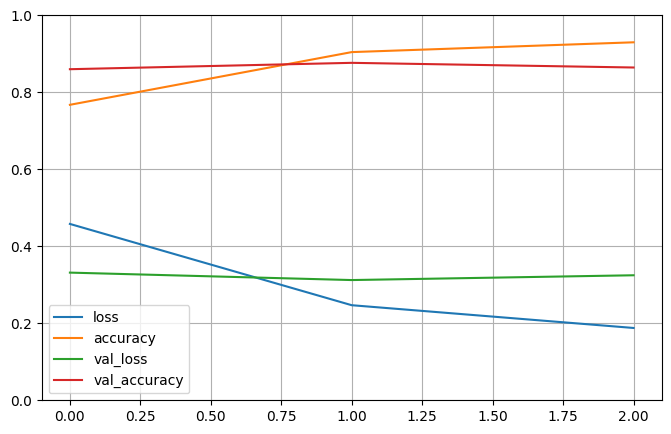

In [96]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [97]:
# Classification Report
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report (LSTM):\n", classification_report(y_test, y_pred_lstm))

782/782 [==============================] - 36s 45ms/step
Classification Report (LSTM):
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     12500
           1       0.84      0.91      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000



2. Bidirectional LSTM model creation

In [99]:
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(input_dim=max_features,
                                  output_dim=embedding_vector_length,
                                  input_length=maxlen))
model_bidirectional.add(Bidirectional(LSTM(100)))
model_bidirectional.add(Dense(1, activation='sigmoid'))


In [101]:
model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
history_bidirectional = model_bidirectional.fit(X_train, y_train,
                                                epochs=epochs,
                                                batch_size=batch_size,
                                                validation_data=(X_test, y_test))

Epoch 1/3
196/196 [==============================] - 584s 3s/step - loss: 0.2530 - accuracy: 0.9026 - val_loss: 0.3981 - val_accuracy: 0.8248
Epoch 2/3
196/196 [==============================] - 556s 3s/step - loss: 0.2627 - accuracy: 0.8923 - val_loss: 0.3226 - val_accuracy: 0.8736
Epoch 3/3
196/196 [==============================] - 549s 3s/step - loss: 0.1695 - accuracy: 0.9372 - val_loss: 0.3347 - val_accuracy: 0.8718


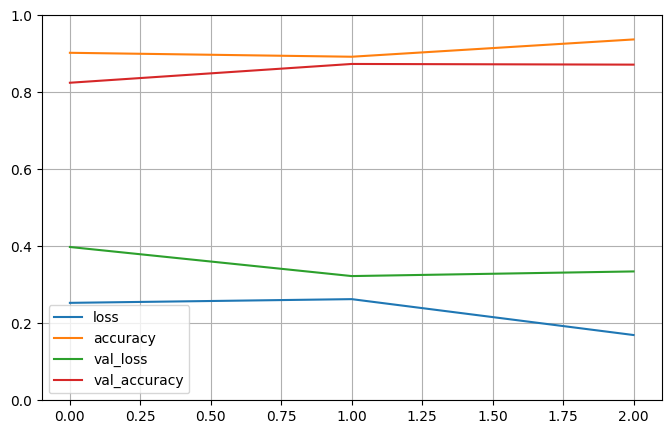

In [105]:
pd.DataFrame(history_bidirectional.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [106]:
# Classification Report
y_pred_bidirectional = (model_bidirectional.predict(X_test) > 0.5).astype("int32")
print("Classification Report (LSTM):\n", classification_report(y_test, y_pred_bidirectional))

782/782 [==============================] - 130s 165ms/step
Classification Report (LSTM):
               precision    recall  f1-score   support

           0       0.86      0.89      0.87     12500
           1       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



3. Stacked LSTM model creation

In [107]:
model_stacked_lstm = Sequential()
model_stacked_lstm.add(Embedding(input_dim=max_features,
                                 output_dim=embedding_vector_length,
                                 input_length=maxlen))
model_stacked_lstm.add(LSTM(100, return_sequences=True))
model_stacked_lstm.add(LSTM(100))
model_stacked_lstm.add(Dense(1, activation='sigmoid'))

In [108]:
model_stacked_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [109]:
history_stacked_lstm = model_stacked_lstm.fit(X_train, y_train,
                                              epochs=epochs,
                                              batch_size=batch_size,
                                              validation_data=(X_test, y_test))

Epoch 1/3
196/196 [==============================] - 647s 3s/step - loss: 0.4586 - accuracy: 0.7736 - val_loss: 0.3608 - val_accuracy: 0.8479
Epoch 2/3
196/196 [==============================] - 672s 3s/step - loss: 0.2921 - accuracy: 0.8840 - val_loss: 0.3086 - val_accuracy: 0.8716
Epoch 3/3
196/196 [==============================] - 635s 3s/step - loss: 0.2058 - accuracy: 0.9231 - val_loss: 0.3189 - val_accuracy: 0.8664


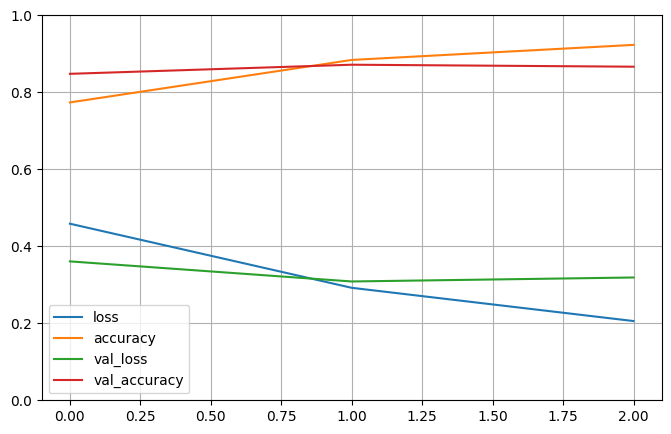

In [112]:
pd.DataFrame(history_stacked_lstm.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [113]:
# Classification Report
y_pred_stacked_lstm = (model_bidirectional.predict(X_test) > 0.5).astype("int32")
print("Classification Report (LSTM):\n", classification_report(y_test, y_pred_stacked_lstm))

782/782 [==============================] - 130s 166ms/step
Classification Report (LSTM):
               precision    recall  f1-score   support

           0       0.86      0.89      0.87     12500
           1       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



### Conclusions:

- ***LSTM model***: Weighted average f1-score: **0.86**.
- ***Bidirectional LSTM model***: Weighted average f1-score: **0.87**.
- ***Stacked LSTM model***: Weighted average f1-score: **0.87**.
- The Bidirectional LSTM model performed best among the three, with a validation accuracy of **0.8718** and high metric values.
- Stacked LSTM has good accuracy, almost the same as Bidirectional LSTM.